Global Best Position = [1.99999997 3.         5.        ]
Global Best Cost = 1.0000000000000007
Function: (x-2)**2 + (y-3)**2 + (z-5)**2 + 1


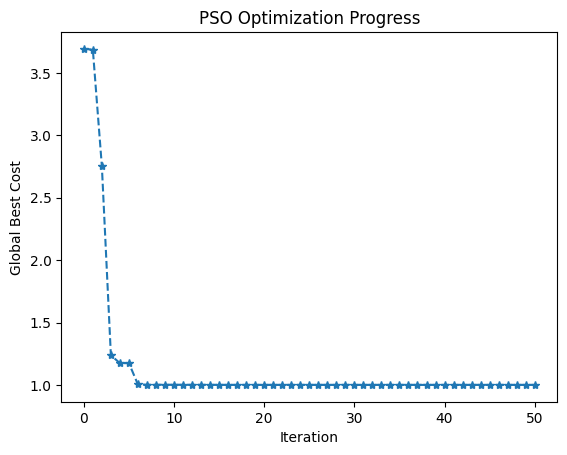

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the objective function
def func(var):
    x, y, z = var[0], var[1], var[2]
    return (x - 2)**2 + (y - 3)**2 + (z - 5)**2 + 1

# Define bounds and parameters
bounds = np.array([[-5, -5, -5], [5, 5, 5]])
vel_bound = np.array([0, 0.1])
num_particles = 10      # Number of particles
max_iter = 50           # Max iterations
w = 0.5                 # Inertia weight
c1 = 0.8                # Cognitive acceleration coefficient
c2 = 0.8                # Social acceleration coefficient

# Random initialization of particle positions and velocities
particle_pos = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_particles, 3))
particle_vels = np.random.uniform(low=vel_bound[0], high=vel_bound[1], size=(num_particles, 3))
best_position = particle_pos.copy()
best_sol = np.array([func(particles) for particles in particle_pos])
global_best_pos = particle_pos[np.argmin(best_sol)].copy()
global_best_sol = np.min(best_sol)

# Lists to store iteration number and global cost for plotting
iterations = [0]
global_cost = [global_best_sol]

# PSO main loop
for i in range(max_iter):
    r1 = np.random.rand(num_particles, 3)
    r2 = np.random.rand(num_particles, 3)
    
    # Velocity updates
    cognitive = c1 * r1 * (best_position - particle_pos)
    social = c2 * r2 * (global_best_pos - particle_pos)
    particle_vels = w * particle_vels + cognitive + social
    
    # Position updates and boundary check
    particle_pos += particle_vels
    particle_pos = np.clip(particle_pos, bounds[0], bounds[1])  # Keep positions within bounds

    # Update individual and global bests
    update_sol = np.array([func(particles) for particles in particle_pos])
    best_bool = update_sol < best_sol
    best_position[best_bool] = particle_pos[best_bool]
    best_sol[best_bool] = update_sol[best_bool]
    
    # Update global best if a better solution is found
    best_idx = np.argmin(best_sol)
    if best_sol[best_idx] < global_best_sol:
        global_best_pos = particle_pos[best_idx].copy()
        global_best_sol = best_sol[best_idx]
    
    # Record iteration and global best cost for plotting
    iterations.append(i + 1)
    global_cost.append(global_best_sol)

# Output final results
print("Global Best Position =", global_best_pos)
print("Global Best Cost =", global_best_sol)
print("Function: (x-2)**2 + (y-3)**2 + (z-5)**2 + 1")

# Plotting the cost function over iterations
plt.plot(iterations, global_cost, '*--')
plt.xlabel("Iteration")
plt.ylabel("Global Best Cost")
plt.title("PSO Optimization Progress")
plt.show()
